# 5HT effects in feeding

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('inter', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure3/'
panelpath = figurepath + '/panels and data/'
with open(picklepath+ 'W1118Dark_e.pickle', 'rb') as f:
            W1118Dark_e = pickle.load(f)
with open(picklepath + 'W1118Dark_ele.pickle', 'rb') as f:
            W1118Dark_ele = pickle.load(f)
with open(picklepath + 'TrhCsCh_ele.pickle', 'rb') as f:
            TrhCsCh_ele = pickle.load(f)
with open(picklepath + 'TrhACR1_ele.pickle', 'rb') as f:
            TrhACR1_ele = pickle.load(f)    
with open(picklepath + 'R50CsCh_ele.pickle', 'rb') as f:
            R50CsCh_ele = pickle.load(f)
with open(picklepath + 'R50ACR1_ele.pickle', 'rb') as f:
            R50ACR1_ele = pickle.load(f) 


TrhCsCh = pd.read_csv(picklepath + 'TrhCsCh_ele.csv').sort_values(by = 'Light')
R50CsCh = pd.read_csv(picklepath + 'R50CsCh_ele.csv').sort_values(by = 'Light')
TrhACR = pd.read_csv(picklepath + 'TrhACRRound2_ele.csv').sort_values(by = 'Light')
R50ACR = pd.read_csv(picklepath + 'R50ACRRound2_ele.csv').sort_values(by = 'Light')
for df in [TrhCsCh, R50CsCh, TrhACR, R50ACR]:
    df['Volume'] = df['Volume']*1000
    df['Meal Size'] = df['Meal Size']*1000
    df['Feed Speed'] = df['Feed Speed']*1000
cm = W1118Dark_ele.cm

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_6921/1094665554.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_6921/1094665554.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [ ]:
TrhCsCh['GenoReduced'] = TrhCsCh.Genotype.replace({'trh-gal4>uas-chrimson':'Trh>CsCh', 'w1118; uas-chrimson':'CsCh/w', 'w1118; trh-gal4':'Trh/w'}).astype('category').cat.set_categories(['CsCh/w', 'Trh/w', 'Trh>CsCh'], ordered=True)
R50CsCh['GenoReduced'] = R50CsCh.Genotype.replace({'r50h05-gal4>uas-chrimson':'R50H05>CsCh', 'w1118;uas-cschrimson':'CsCh/w', 'w1118; r50h05-gal4':'R50H05/w'}).astype('category').cat.set_categories(['CsCh/w', 'R50H05/w', 'R50H05>CsCh'], ordered=True)
TrhACR['GenoReduced'] = TrhACR.Genotype.replace({'trh-gal4>uas-acr1':'Trh>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; trh-gal4':'Trh/w'}).astype('category').cat.set_categories(['ACR1/w', 'Trh/w', 'Trh>ACR1'], ordered=True)
R50ACR['GenoReduced'] = R50ACR.Genotype.replace({'r50h05-gal4>uas-acr1':'R50H05>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; r50h05-gal4':'R50H05/w'}).astype('category').cat.set_categories(['ACR1/w', 'R50H05/w', 'R50H05>ACR1'], ordered=True)

trhcschpalette = {'Trh>CsCh':'orangered', 'CsCh/w':'gray', 'Trh/w':'k'}
r50cschpalette = {'R50H05>CsCh':'orangered', 'CsCh/w':'gray', 'R50H05/w':'k'}
trhacrpalette = {'Trh>ACR1':'seagreen', 'ACR1/w':'gray', 'Trh/w':'k'}
r50acrpalette = {'R50H05>ACR1':'seagreen', 'ACR1/w':'gray', 'R50H05/w':'k'}



In [ ]:
TrhCsCh.columns

Index(['Light', 'Genotype', 'Status', 'ID', 'Starvation', 'Meal Size',
       'Feed Speed', 'Prefeed Speed', 'Duringfeed Speed', 'Postfeed Speed',
       'Meal Duration', 'Volume', 'Count', 'Duration', 'Latency',
       'Duringfeed Speed Ratio', 'Perifeed Speed Ratio', 'Speed', 'Height',
       'Food Port Occupancy', 'Ctrl Port Occupancy', 'Falls', 'date',
       'GenoReduced'],
      dtype='object')

In [ ]:

cschpalette = {'Ctrl-Red Light On':'k', 'Ctrl-Red Light Off':'lightgray', 'Test-Red Light On':'orangered', 'Test-Red Light Off':'mistyrose' }
acrpalette = {'Ctrl-Green Light On':'k', 'Ctrl-Green Light Off':'lightgray', 'Test-Green Light On':'seagreen', 'Test-Green Light Off':'paleturquoise' }


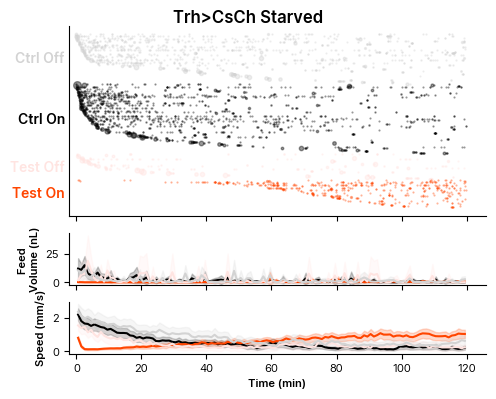

In [ ]:
setFont('inter', 9)
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.family':'inter'})
a, b, c = TrhCsCh_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=cschpalette, dotbase=1, dotratio=10, figsize=(5, 4),
                                  bubbleLegend = False, bubbleYLabelSize = 10)
a.suptitle('Trh>CsCh Starved', fontname = 'inter',fontsize = 12, weight = 'semibold', backgroundcolor= 'lightsteelblue')
a.savefig(panelpath+'TrhCsCh_raster.svg', format="svg")
a.savefig(panelpath+'TrhCsCh_raster.png', dpi = 300)

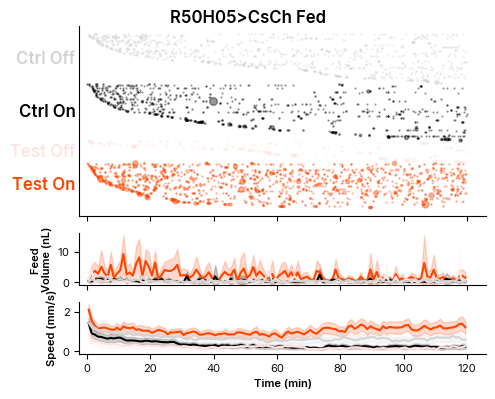

In [ ]:

setFont('inter', 9)

a, b, c = R50CsCh_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=cschpalette, dotbase=1, dotratio=10, figsize=(5, 4), bubbleLegend = False)
a.suptitle('R50H05>CsCh Fed',fontname = 'inter',fontsize = 12, weight = 'semibold', backgroundcolor= 'orange')
a.savefig(panelpath+'R50CsCh_raster.svg')

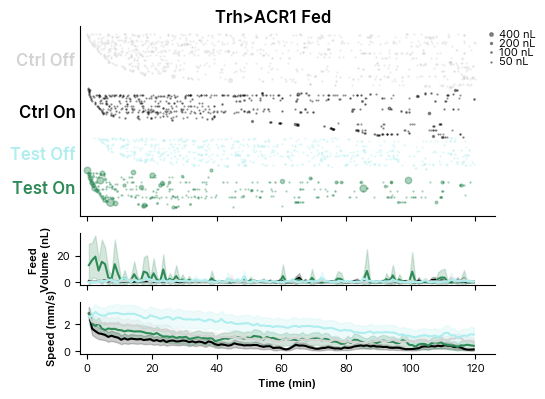

In [ ]:
setFont('inter', 9)
a, b, c = TrhACR1_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=acrpalette, dotbase=1, dotratio=10, figsize=(5.5, 4), bubbleLegend = True)
a.suptitle('Trh>ACR1 Fed', weight = 'semibold',fontsize = 12,fontname = 'inter', backgroundcolor= 'orange')
a.savefig(panelpath+'TrhACR1_raster.svg')



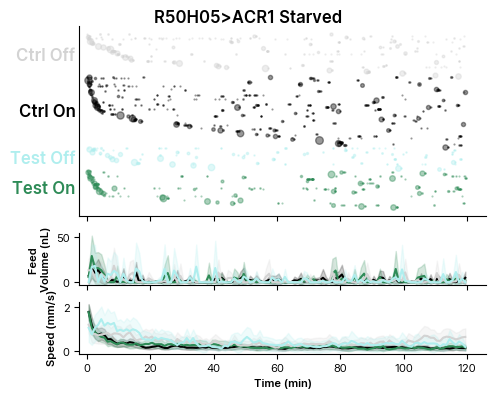

In [ ]:

setFont('inter', 9)
a, b, c = R50ACR1_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=acrpalette, dotbase=1, dotratio=10, figsize=(5, 4), bubbleLegend = False)
a.suptitle('R50H05>ACR1 Starved', weight = 'semibold',fontsize = 12,fontname = 'inter', backgroundcolor= 'lightsteelblue')
a.savefig(panelpath+'R50ACR1_raster.svg')


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,AviFile,ChamberID,ExperimentState,FeedDuration_ms,FeedDuration_s,FeedSpeed_nl/s,FeedVol_nl,FeedVol_µl,RelativeTime_s,Valid,...,120beforeFeedSpeed_mm/s,duringFeedSpeed_mm/s,120afterFeedSpeed_mm/s,revisedFeedDuration_s,countLogID,120duringPercSpeedGain,120afterPercSpeedGain,revisedFeedDuration_min,FeedVol_pl,Starvedhrs
0,FeedEvent_56_2022-03-25_12-23-53.615.avi,2022-03-25_12-23-52_Chamber29,Green LED 3V 30uWmm2,7479.0,7.479,0.305121,2.282,0.002282,1.163,True,...,3.313326,1.755578,1.395353,0.4485,2022-03-25_12-23-48_Ch29_Obj1,-47.014622,-57.886635,0.007475,2282.0,0.0
1,FeedEvent_56_2022-03-25_12-24-11.231.avi,2022-03-25_12-23-52_Chamber29,Green LED 3V 30uWmm2,22502.0,22.502,3.308950,74.458,0.074458,18.779,True,...,3.058788,0.229592,1.001303,17.7490,2022-03-25_12-23-48_Ch29_Obj1,-92.494031,-67.264713,0.295817,74458.0,0.0
2,FeedEvent_56_2022-03-25_12-24-49.755.avi,2022-03-25_12-23-52_Chamber29,Green LED 3V 30uWmm2,10736.0,10.736,3.624721,38.915,0.038915,57.302,True,...,1.586719,0.433526,0.756151,7.2625,2022-03-25_12-23-48_Ch29_Obj1,-72.677852,-52.344976,0.121042,38915.0,0.0
3,FeedEvent_42_2022-04-05_17-15-10.477.avi,2022-04-05_17-15-08_Chamber22,Green LED 3V 30uWmm2,3890.0,3.890,1.116710,4.344,0.004344,2.056,True,...,2.948880,0.788858,0.186109,3.5560,2022-04-05_17-15-04_Ch22_Obj1,-73.248894,-93.688838,0.059267,4344.0,24.0
4,FeedEvent_42_2022-04-05_17-15-44.579.avi,2022-04-05_17-15-08_Chamber22,Green LED 3V 30uWmm2,45903.0,45.903,5.215629,239.413,0.239413,36.158,True,...,0.459677,0.103055,0.534725,45.5525,2022-04-05_17-15-04_Ch22_Obj1,-77.581038,16.326091,0.759208,239413.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,NaN,2022-04-05_14-42-28_Chamber18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1208,NaN,2022-04-05_14-42-28_Chamber19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1209,NaN,2022-04-05_14-42-28_Chamber28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1210,NaN,2022-04-05_14-42-28_Chamber29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


In [ ]:
data = TrhCsCh
metric = 'Volume'
subdata = data[['GenoReduced', 'Status', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
subdata.to_csv(panelpath+'TrhCsCh_Vcontrast.csv')

trhCsChV = dabest.load(TrhCsCh, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
ftrhCsChV = trhCsChV.mean_diff.plot(raw_marker_size=.4, es_marker_size= 5, swarm_desat = 1,color_col='GenoReduced', custom_palette= trhcschpalette, fig_size=(4.5, 4), swarm_ylim= [-10, 800], swarm_label='Total Volume (nL)')
ftrhCsChV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
order = [0,1,2]
handles = TrhCsCh.GenoReduced.unique().to_list()
ftrhCsChV.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='best', fontsize= 10, markerscale = 1, )
leg = ftrhCsChV.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(trhcschpalette['Trh/w'])
hl_dict['_child1'].set_color(trhcschpalette['CsCh/w'])
hl_dict['_child2'].set_color(trhcschpalette['Trh>CsCh'])
ftrhCsChV.suptitle('Trh>CsCh Starved', weight = 'semibold', fontsize = 20,backgroundcolor= 'lightsteelblue', y=.97)

ftrhCsChV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
ftrhCsChV.savefig(panelpath+'TrhCsCh_Vcontrast.svg')

KeyError: "['GenoReduced'] not in index"

In [ ]:
data = R50CsCh
metric = 'Volume'
subdata = data[['GenoReduced', 'Status', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
subdata.to_csv(panelpath+'R50CsCh_Vcontrast.csv')

r50CsChV = dabest.load(R50CsCh, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
fr50CsChV = r50CsChV.mean_diff.plot(raw_marker_size=0.4, es_marker_size= 5, swarm_desat = 1,custom_palette= r50cschpalette, fig_size=(4.5, 4), swarm_ylim= [-10, 800],  swarm_label='Total Volume (nL)')
fr50CsChV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
order = [1, 2, 0]
handles = R50CsCh.GenoReduced.unique().to_list()
fr50CsChV.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='best', fontsize= 10, markerscale = 1, )
leg = fr50CsChV.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(r50cschpalette['R50H05/w'])
hl_dict['_child1'].set_color(r50cschpalette['CsCh/w'])
hl_dict['_child2'].set_color(r50cschpalette['R50H05>CsCh'])
fr50CsChV.suptitle('R50H05>CsCh Fed', weight = 'semibold',fontsize = 20, backgroundcolor= 'orange', y=.97)

fr50CsChV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
fr50CsChV.savefig(panelpath+'R50CsCh_Vcontrast.svg')

In [ ]:
data = TrhACR
metric = 'Volume'
subdata = data[['GenoReduced', 'Status', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
subdata.to_csv(panelpath+'TrhACR1_Vcontrast.csv')


rtrhACRV = dabest.load(TrhACR, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
ftrhACRV = rtrhACRV.mean_diff.plot(raw_marker_size=0.4, es_marker_size= 5, swarm_desat = 1,custom_palette= trhacrpalette, fig_size=(4.5, 4),swarm_ylim= [-10, 800],  swarm_label='Total Volume (nL)')
ftrhACRV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
order = [2, 0, 1]
handles = TrhACR.GenoReduced.unique().to_list()
ftrhACRV.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='best', fontsize= 10, markerscale = 1, )
leg = ftrhACRV.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color('k')
hl_dict['_child1'].set_color(trhacrpalette['ACR1/w'])
hl_dict['_child2'].set_color(trhacrpalette['Trh>ACR1'])

ftrhACRV.suptitle('Trh>ACR1 Fed', weight = 'semibold',fontsize = 20, backgroundcolor= 'orange', y=.97)
ftrhACRV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
ftrhACRV.savefig(panelpath+'TrhACR1_Vcontrast.svg')




In [ ]:
data = R50ACR
metric = 'Volume'
subdata = data[['GenoReduced', 'Status', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
subdata.to_csv(panelpath+'R50ACR1_Vcontrast.csv')

r50ACRV = dabest.load(R50ACR, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
fr50ACRV = r50ACRV.mean_diff.plot(raw_marker_size=0.4, es_marker_size= 5, swarm_desat = 1, custom_palette= r50acrpalette, fig_size=(4.5, 4),swarm_ylim= [-10, 800],  swarm_label='Total Volume (nL)')
fr50ACRV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
order = [1,2,0]
handles = R50ACR.GenoReduced.unique().to_list()
fr50ACRV.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='best', fontsize= 10, markerscale = 1, )
leg = fr50ACRV.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(r50acrpalette['R50H05/w'])
hl_dict['_child1'].set_color(r50acrpalette['ACR1/w'])
hl_dict['_child2'].set_color(r50acrpalette['R50H05>ACR1'])
fr50ACRV.suptitle('R50H05>ACR1 Starved', weight = 'semibold',fontsize = 20, backgroundcolor= 'lightsteelblue', y=.97)

fr50ACRV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
fr50ACRV.savefig(panelpath+'R50ACR1_Vcontrast.svg')

KeyError: "['GenoReduced'] not in index"

In [ ]:
hl_dict

{'_child0': <matplotlib.collections.PathCollection>,
 '_child1': <matplotlib.collections.PathCollection>,
 '_child2': <matplotlib.collections.PathCollection>}

In [ ]:
r50ACRV.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Ctrl Green Light Off,Test Green Light Off,40,20,mean difference,None,51.411850,95,-38.453825,133.895450,0.2514,0.254399,-1.157864,0.244988,-1.174517,0.174459,313.0
1,Ctrl Green Light On,Test Green Light On,77,38,mean difference,None,23.102478,95,-60.329188,109.594741,0.6256,0.604650,-0.519634,0.625129,-0.489936,0.366990,1312.0


metric             Volume
y                  Volume
swarmLabel    Volume (nL)
yUnit                  nL
Name: 0, dtype: object
metric        Count
y             Count
swarmLabel    Count
yUnit              
Name: 1, dtype: object
metric            Meal Size
y                 Meal Size
swarmLabel    MealSize (nL)
yUnit                    nL
Name: 2, dtype: object
metric              Duration
y                   Duration
swarmLabel    Duration (min)
yUnit                    min
Name: 3, dtype: object
metric              Latency
y                   Latency
swarmLabel    Latency (min)
yUnit                   min
Name: 4, dtype: object
metric               Speed
y                    Speed
swarmLabel    Speed (mm/s)
yUnit                 mm/s
Name: 5, dtype: object
metric        Perifeed Speed Ratio
y             Perifeed Speed Ratio
swarmLabel    Perifeed Speed Ratio
yUnit                             
Name: 6, dtype: object


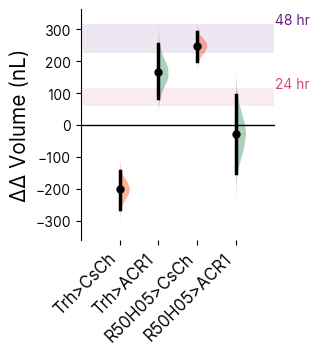

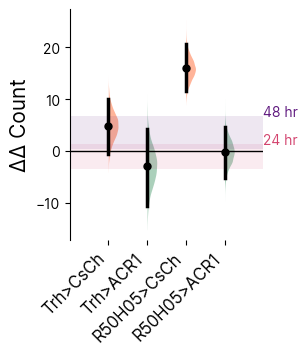

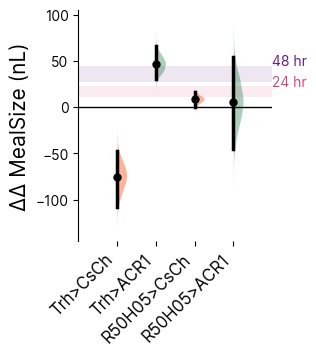

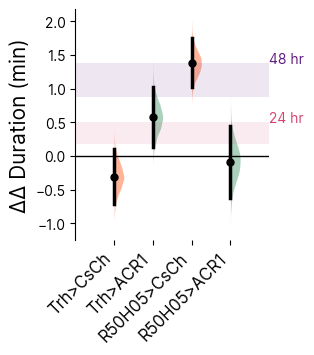

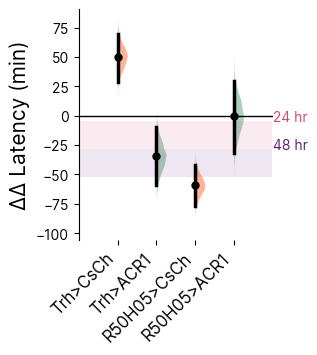

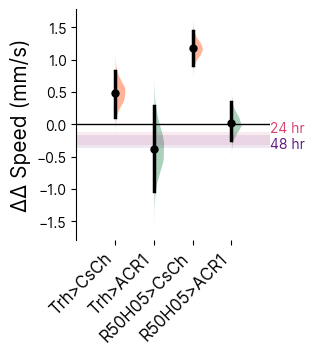

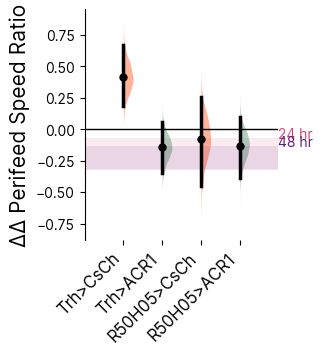

In [ ]:

palettes = [trhcschpalette, trhacrpalette, r50cschpalette, r50acrpalette]
wtBaseline = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/Figure1/wtBaseline.csv')
def plotForestDD(contrasts, metric, palettes = palettes, exptNames = None, labelX = True, imagepath = None):
    def pickouttestcolor(palette):
        s = [i for i in palette.keys() if 'w1118' not in i]    
        return palette[s[0]]
    if palettes:
        testColors = [pickouttestcolor(p) for p in palettes]
    DDbootstraps = [c.mean_diff.delta_delta.bootstraps_delta_delta for c in contrasts]
    setFont('inter', 10)
    fForest = plt.figure(figsize = [2.5, 3])
    ax = plt.subplot(111)
    default_violinplot_kwargs = {'widths':0.5, 'vert':True,
                                   'showextrema':False, 'showmedians':False}
    v = ax.violinplot(DDbootstraps, **default_violinplot_kwargs)
    dabest.plot_tools.halfviolin(v, alpha = 0.4)
    ax.plot([0, len(contrasts)+1], [0, 0], 'k', linewidth = 1)
    ticks = list(range(1, len(contrasts)+1))
    for i in ticks:
        ax.plot(i, contrasts[i-1].mean_diff.delta_delta.difference, 'k.', markersize = 10)
        ax.plot([i, i], [contrasts[i-1].mean_diff.delta_delta.bca_low, contrasts[i-1].mean_diff.delta_delta.bca_high], 'k', linewidth = 2.5)

    ax.set_xticks(ticks)
    ax.set_xlim([0, len(contrasts)+1])
#     ax.set_xticklabels(mainDataPathList[1::],
#                       rotation = 45, ha = 'right', fontsize = 20)
    ax.set_ylabel('ΔΔ ' + metric.swarmLabel, fontsize = 15)
#     ax.set_title(metric.metric, fontsize = 20)
    # ax.set_ylim(-0.5, 0.2)
    ax.spines['bottom'].set_color(None)
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    # ax.spines['left'].set_color(None)

    for i in range(0, len(contrasts)):
        if palettes:
                ax.collections[i].set_fc(testColors[i])
        else:
            if contrasts[i].mean_diff.delta_delta.bca_low>0:
                ax.collections[i].set_fc('g')
            if contrasts[i].mean_diff.delta_delta.bca_high<0:
                ax.collections[i].set_fc('r')
    # ax.set_xticks(list(range(i+1)))
    if exptNames:
        if labelX:
            ax.set_xticklabels(exptNames, 
                               rotation = 45, 
                               ha = 'right',
                               fontsize = 12)
        else:
            ax.set_xticklabels(['']* (i+1))
    
    return fForest

exptNames = ['Starved      \nDriver      \nResponder', '24 Hr\nTrh\nCsChR', '0 Hr\nTrh\nGtACR1', '0 Hr\nR50H05\nCsChR', '24 Hr\nR50H05\nGtACR1']
feedMetricMap = {'metric': ['Volume', 'Count', 'Meal Size', 'Duration', 'Latency', 'Speed', 'Perifeed Speed Ratio'], 
             'y' : ['Volume', 'Count', 'Meal Size', 'Duration', 'Latency', 'Speed', 'Perifeed Speed Ratio'], 
             'swarmLabel': ['Volume (nL)', 'Count', 'MealSize (nL)', 'Duration (min)', 'Latency (min)', 'Speed (mm/s)', 'Perifeed Speed Ratio'],
                'yUnit': ['nL', '', 'nL', 'min', 'min', 'mm/s',  '']}
feedMetricMapDf = pd.DataFrame(data = feedMetricMap)


for i in range(0, 7):
    
    entry = feedMetricMapDf.loc[i]
    print(entry)
#     setFont('Inter',9)
    cTrhCsCh = dabest.load(TrhCsCh, x = ['Status', 'GenoReduced'], experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    cTrhACR  = dabest.load(TrhACR, x = ['Status', 'GenoReduced'], experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    cR50CsCh = dabest.load(R50CsCh, x = ['Status', 'GenoReduced'], experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    cR50ACR  = dabest.load(R50ACR, x = ['Status', 'GenoReduced'],  experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    if i ==4:
        labelX = True
    else:
        labelX = True
    contrasts = [cTrhCsCh, cTrhACR, cR50CsCh, cR50ACR]
    Forest = plotForestDD(contrasts, entry, exptNames = ['Trh>CsCh', 'Trh>ACR1', 'R50H05>CsCh', 'R50H05>ACR1'], labelX = labelX)
    wtB = wtBaseline.loc[wtBaseline.Metric == entry.metric]
    x = np.arange(0.0, 5, 0.01)
    l24 = wtB.L24
    h24 = wtB.H24
    l48 = wtB.L48
    h48 = wtB.H48
    Forest.axes[0].fill_between(x, l24, h24, alpha=0.1, facecolor = sns.color_palette("magma")[3],zorder=1)
    Forest.axes[0].fill_between(x, l48, h48, alpha=0.1, facecolor = sns.color_palette("magma")[1],zorder=1)
    Forest.axes[0].text(5, h24, '24 hr', color = sns.color_palette("magma")[3])
    if entry.metric == 'Speed':
        Forest.axes[0].text(5, l48, '48 hr', color = sns.color_palette("magma")[1])
    else:
        Forest.axes[0].text(5, h48, '48 hr', color = sns.color_palette("magma")[1])

    Forest.savefig(figurepath+entry.metric + '.svg')




In [ ]:
contrasts[0].mean_diff.delta_delta

DABEST v2024.03.29
                  
Good afternoon!
The current time is Tue Jul 23 14:55:58 2024.

The delta-delta between Red Light Off and Red Light On is 0.414 [95%CI 0.182, 0.673].
The p-value of the two-sided permutation t-test is 0.0048, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing the effect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

In [ ]:
## from svgutils.compose import *

Figure("16cm", "17cm", 
    Panel(SVG(figurepath + 'trhcsch_inverted.svg').scale(0.004),
    Text("a", -0.1, 0, size=0.3, font = 'Inter', weight='bold') ).move(1, .4),
    Panel(SVG(figurepath + 'trhcsch_inverted.svg').scale(0.004),
    Text("b", 0, 0, size=0.3, font = 'inter', weight='bold') ).move(1, 3),
    Panel(SVG(figurepath + 'starvationprotocol.svg').scale(0.009),
    Text("c", 0, -.2, size=0.3, font = 'inter', weight='bold') ).move(1, 5.7),
    Panel(SVG(figurepath + 'TrhCsCh_Raster.svg').scale(0.015),
    Text("d", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(5, .4),
    Panel(SVG(figurepath + 'TrhACR1_raster.svg').scale(0.015),
    Text("e", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(9.5, .4),
    Panel(SVG(figurepath + 'R50CsCh_raster.svg').scale(0.015),
    Text("f", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(5, 5),
    Panel(SVG(figurepath + 'R50ACR1_raster.svg').scale(0.015),
    Text("g", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(9.5, 5),
       
    Panel(SVG(figurepath + 'TrhCsCh_Vcontrast.svg').scale(0.01),
    Text("h", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(1, 9.5),
    Panel(SVG(figurepath + 'TrhACR1_Vcontrast.svg').scale(0.01),
    Text("i", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(4.5, 9.5),
    Panel(SVG(figurepath + 'R50CsCh_Vcontrast.svg').scale(0.01),
    Text("j", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(8, 9.5),
    Panel(SVG(figurepath + 'R50ACR1_Vcontrast.svg').scale(0.01),
    Text("k", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(11.5, 9.5),
       
    Panel(SVG(figurepath + 'Volume.svg').scale(0.01),
    Text("l", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(1, 12.5),
    Panel(SVG(figurepath + 'Duration.svg').scale(0.01),
    Text("m", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(3.5, 12.5),
    Panel(SVG(figurepath + 'Meal Size.svg').scale(0.01),
    Text("n", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(6, 12.5),
    Panel(SVG(figurepath + 'Count.svg').scale(0.01),
    Text("o", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(8.5, 12.5),
    Panel(SVG(figurepath + 'Latency.svg').scale(0.01),
    Text("p",-0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(11, 12.5),
    Panel(SVG(figurepath + 'Speed.svg').scale(0.01),
    Text("q", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(13.5, 12.5),
    ).save(figurepath+"/Figure3.svg")



In [ ]:
## from svgutils.compose import *

Figure("16cm", "17cm", 
    Panel(SVG(figurepath + 'Trh.svg').scale(0.04),
    Text("", -0.1, 0, size=0.3, font = 'Inter', weight='bold') ).move(1, .4),
    Panel(SVG(figurepath + 'TrhCsCh_Raster.svg').scale(0.02),
    Text("", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(7, .4),
    Panel(SVG(figurepath + 'TrhACR1_raster.svg').scale(0.02),
    Text("", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(11.5, .4),
    Panel(SVG(figurepath + 'R50.svg').scale(0.04),
    Text("", 0, 0, size=0.3, font = 'inter', weight='bold') ).move(1, 5.5),
    Panel(SVG(figurepath + 'R50CsCh_raster.svg').scale(0.02),
    Text("", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(7, 5.5),
    Panel(SVG(figurepath + 'R50ACR1_raster.svg').scale(0.02),
    Text("", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(11.5, 5.5),
       
    Panel(SVG(figurepath + 'TrhCsCh_Vcontrast.svg').scale(0.01),
    Text("", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(1, 10.5),
    Panel(SVG(figurepath + 'TrhACR1_Vcontrast.svg').scale(0.01),
    Text("", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(4.5, 10.5),
    Panel(SVG(figurepath + 'R50CsCh_Vcontrast.svg').scale(0.01),
    Text("", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(8, 10.5),
    Panel(SVG(figurepath + 'R50ACR1_Vcontrast.svg').scale(0.01),
    Text("", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(11.5, 10.5),

    Panel(SVG(figurepath + 'Volume.svg').scale(0.01),
    Text("", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(1, 13.5),
    Panel(SVG(figurepath + 'Duration.svg').scale(0.01),
    Text("", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(3.5, 13.5),
    Panel(SVG(figurepath + 'Meal Size.svg').scale(0.01),
    Text("", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(6, 13.5),
    Panel(SVG(figurepath + 'Count.svg').scale(0.01),
    Text("", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(8.5, 13.5),
    Panel(SVG(figurepath + 'Latency.svg').scale(0.01),
    Text("",-0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(11, 13.5),
    Panel(SVG(figurepath + 'Speed.svg').scale(0.01),
    Text("", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(13.5, 13.5),
    ).save(figurepath+"/Figure3_nolabel.svg")



# 